Haciendo un análisis de final de año en el departamento de recursos humanos, su jefe ha detectado una subida inusual de empleados que renunciaron en el último tiempo. De un total de 1470 empleados un 16% ha renunciado.

Sorprendido por este hecho le pide a usted dos tareas fundamentales:

1. Definir el target de empleado que ha renunciado. ¿Hay uno definido? O ¿Qué características comparten aquellas personas que lo han hecho?

2. Elaborar un modelo de clasificación que permita entender qué empleados pueden llegar a irse en el próximo tiempo. No hay problemas de presupuesto para realizar iniciativas de retención pero, es importante, no perder más empleados este próximo año.

---

En base a esta consigna:

1. Realice un análisis analítico y gráfico del dataset, buscando entender qué características comparten aquellos empleados que han decidido partir.

2. Haga la limpieza necesaria del dataset (incluyendo separación en train y test), utilice el modelo de regresión logística buscando maximizar la métrica que considere adecuada y devuelva la lista de empleados que tienen una mayor proabbilidad de irse este año. Muestre y expliqué qué tanta confianza presenta su modelo.

- **OBJETIVO: MINIMIZAR FN**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Dataset: https://www.kaggle.com/datasets/miraclenifise/hr-employee-attrition-datasets

In [2]:
df_employees= pd.read_csv('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp2_employees/Employee-Attrition.csv')
df_employees

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


---

## **Parte 1: Comprensión y Preparación de Datos**

### → Validación de la data

In [3]:
print("El dataset tiene" , df_employees.shape[0], "filas y", df_employees.shape[1], "columnas")

El dataset tiene 1470 filas y 35 columnas


In [4]:
df_employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
from funciones.funciones import validate_columns
validate_columns(df_employees)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Age,NaN,1470.0,0,0.0,"[42, 37, 21, 31, 45]"
Attrition,2,1470,0,0.0,"[No, No, Yes, No, No]"
BusinessTravel,3,1470,0,0.0,"[Non-Travel, Non-Travel, Travel_Rarely, Non-Tr..."
DailyRate,NaN,1470.0,0,0.0,"[355, 1413, 156, 976, 788]"
Department,3,1470,0,0.0,"[Research & Development, Research & Developmen..."
DistanceFromHome,NaN,1470.0,0,0.0,"[10, 5, 12, 3, 24]"
Education,NaN,1470.0,0,0.0,"[4, 2, 3, 2, 4]"
EducationField,6,1470,0,0.0,"[Technical Degree, Technical Degree, Life Scie..."
EmployeeCount,NaN,1470.0,0,0.0,"[1, 1, 1, 1, 1]"
EmployeeNumber,NaN,1470.0,0,0.0,"[1854, 1440, 494, 1948, 1049]"


In [6]:
df_employees.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


---

### →  Veo los tipos de datos con dtypes

In [7]:
df_employees.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df_employees['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

---

### → Columnas que no son necesarias

#### Paso a dropear las siguientes columnas:
##### `EmployeeCount`: Me muestra la misma cantidad de registros que la longitud del dataset.
##### `StandardHours`: Son todos 80
##### `Over18`: Todos son mayores de 18 años para poder trabajar.
##### `EmployeeNumber`: Es un ID único para cada empleado, no aporta información relevante.


In [9]:
df_employees.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True)

In [10]:
for col in df_employees.columns:
    print(f"Value counts for {col}:")
    print(df_employees[col].value_counts())
    print("\n")


Value counts for Age:
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for DailyRate:
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources           

---

### → Valores outliers

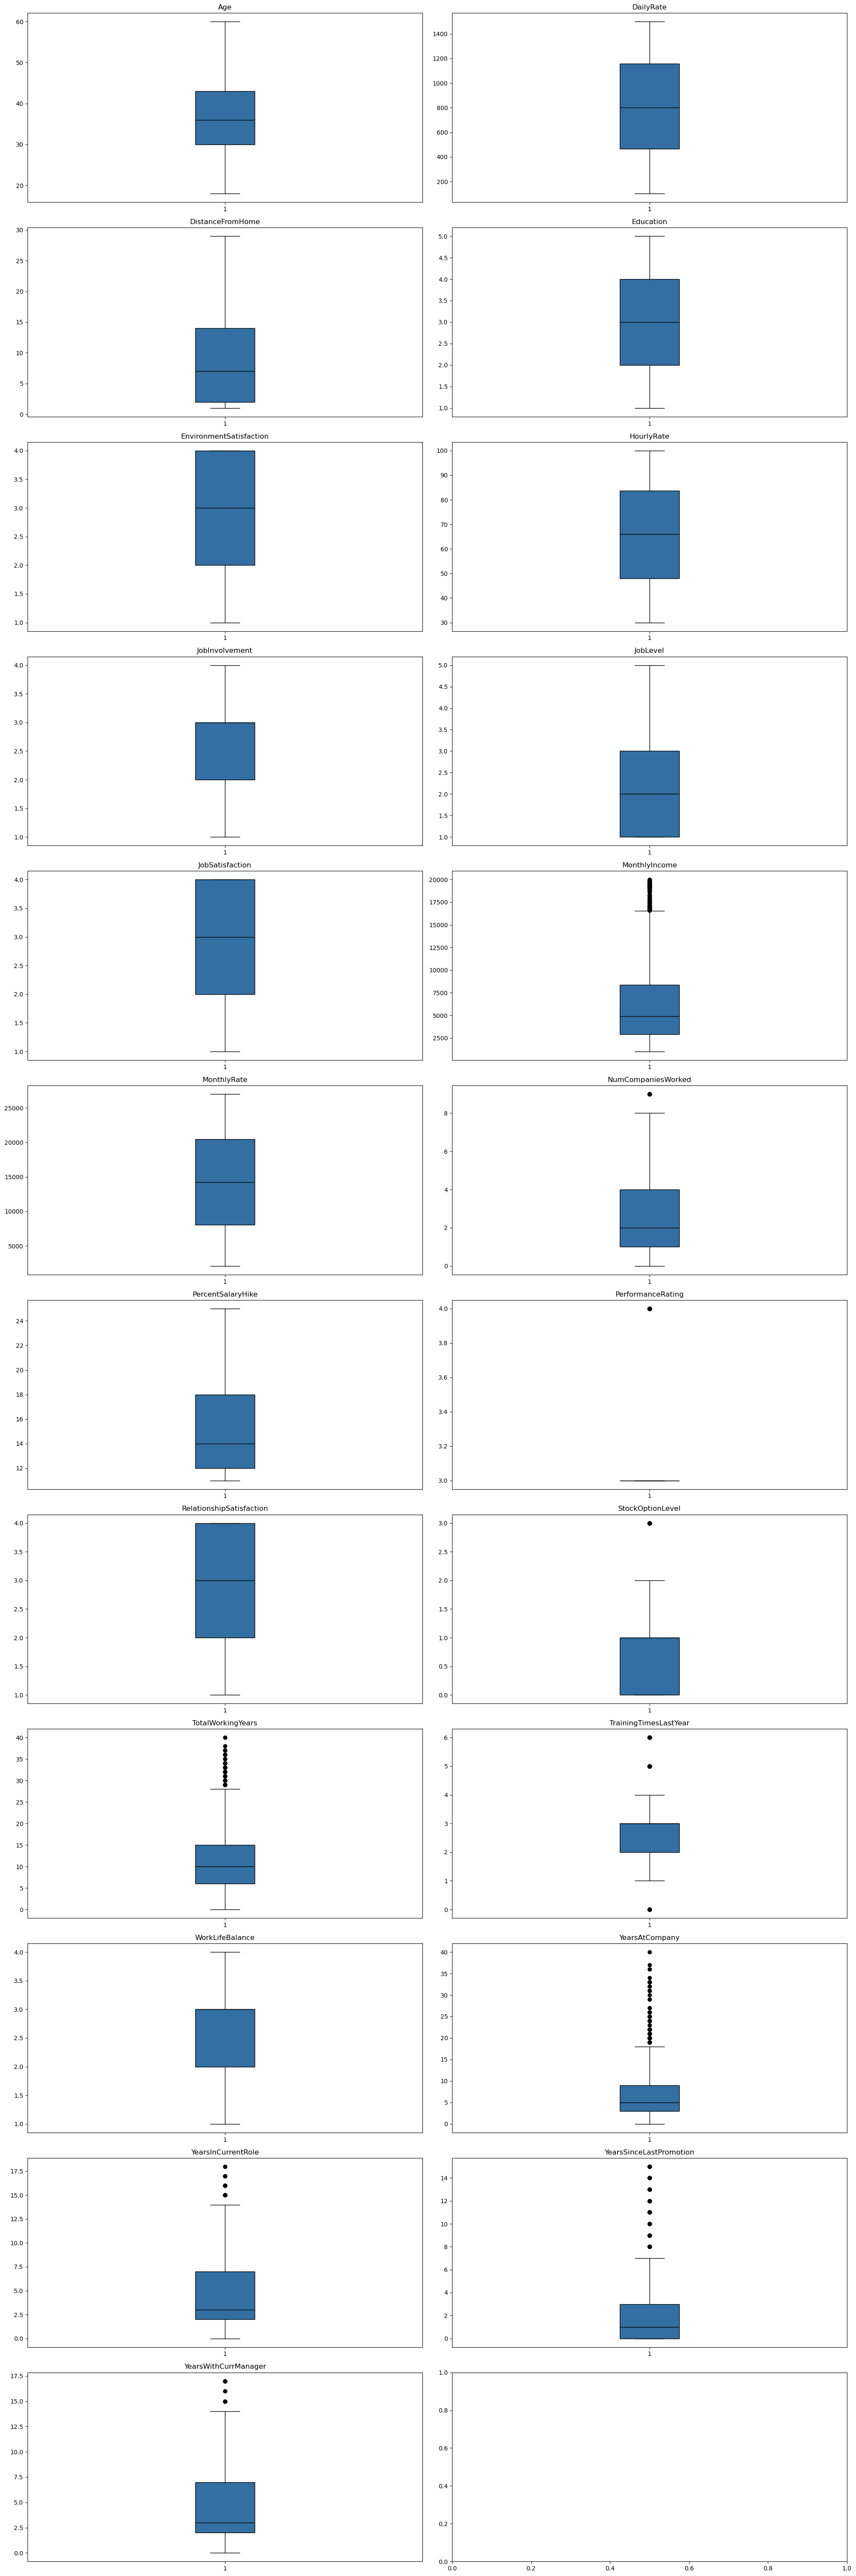

In [11]:
from funciones.funciones import plot_outliers
plot_outliers(df_employees)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos. Además, al ser un dataset de empleados, es posible que existan valores altos de las distintas variables, como por ejemplo MonthlyIncome.

In [12]:
#from funciones.funciones import reconocimiento_de_outliers
#outliers_monthly_income, outlier_values_monthly_income = reconocimiento_de_outliers(df_employees, "MonthlyIncome", 1.5)
#outliers_years_at_company, outlier_values_years_at_company = reconocimiento_de_outliers(df_employees, "YearsAtCompany", 1.5)

---

## **Parte 2: Análisis Exploratorio de Datos**


### → Análisis de sesgos por edad. Usa groupby para calcular la tasa de retiro promedio por grupo de edad. 

In [13]:
df_employees["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
df_employees['Attrition'] = df_employees['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
tasa_de_retiro_etaria = round(df_employees.groupby("Age").agg({"Attrition" : "mean"}).reset_index(), 2)
tasa_de_retiro_etaria

,Age,Attrition
0,18,0.50
1,19,0.67
2,20,0.55
3,21,0.46
4,22,0.31
5,23,0.29
6,24,0.27
7,25,0.23
8,26,0.31
9,27,0.06


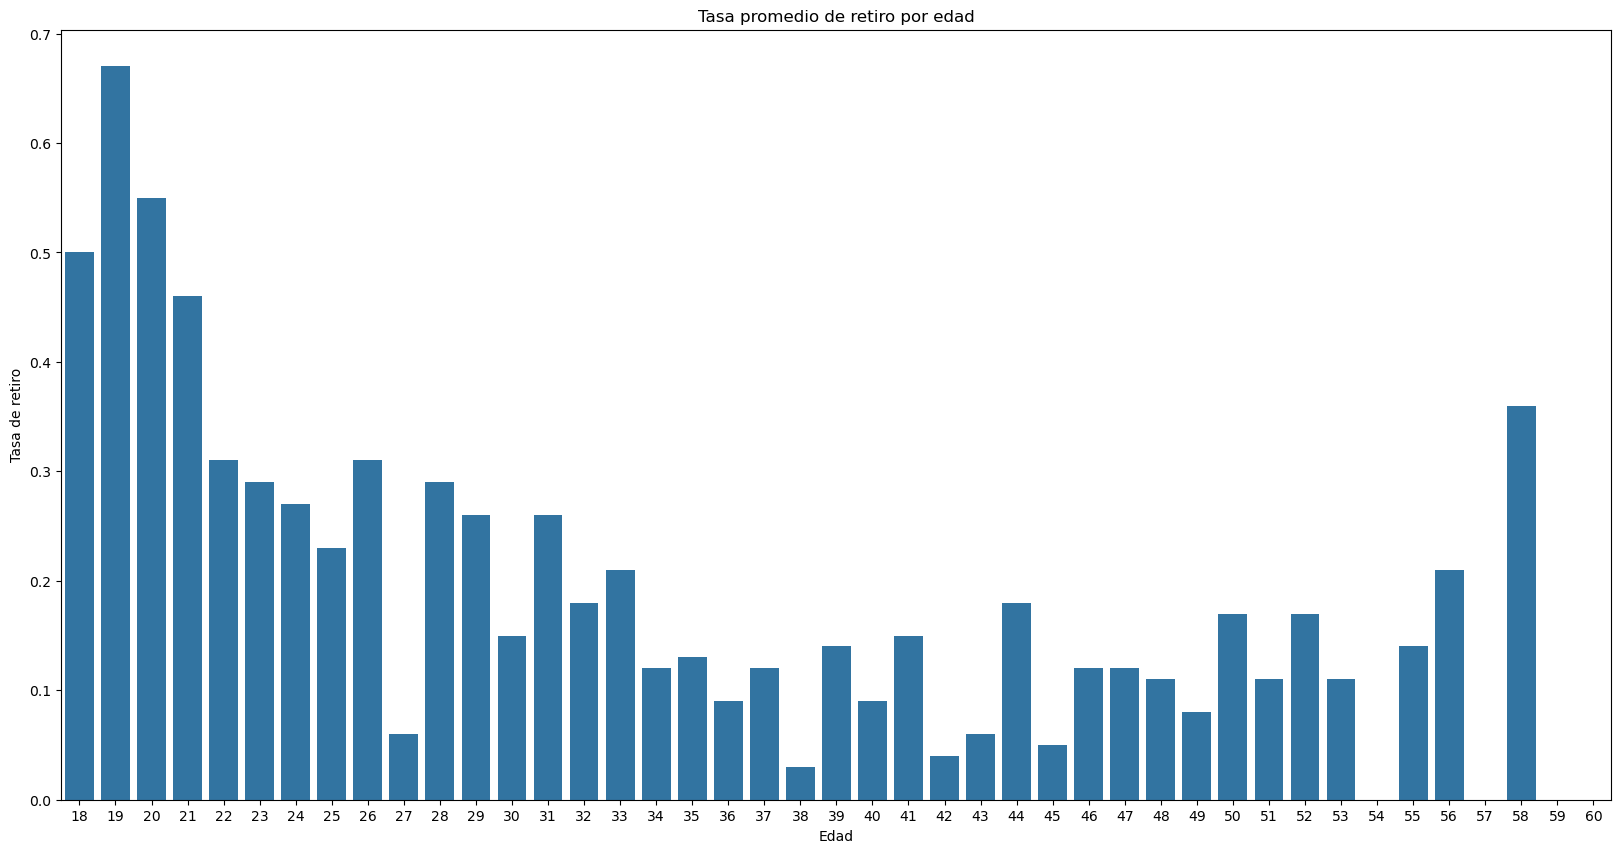

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(data=tasa_de_retiro_etaria, x="Age", y="Attrition")
plt.title("Tasa promedio de retiro por edad")
plt.xlabel("Edad")
plt.ylabel("Tasa de retiro")
plt.show()

Text(0, 0.5, 'Frecuencia')

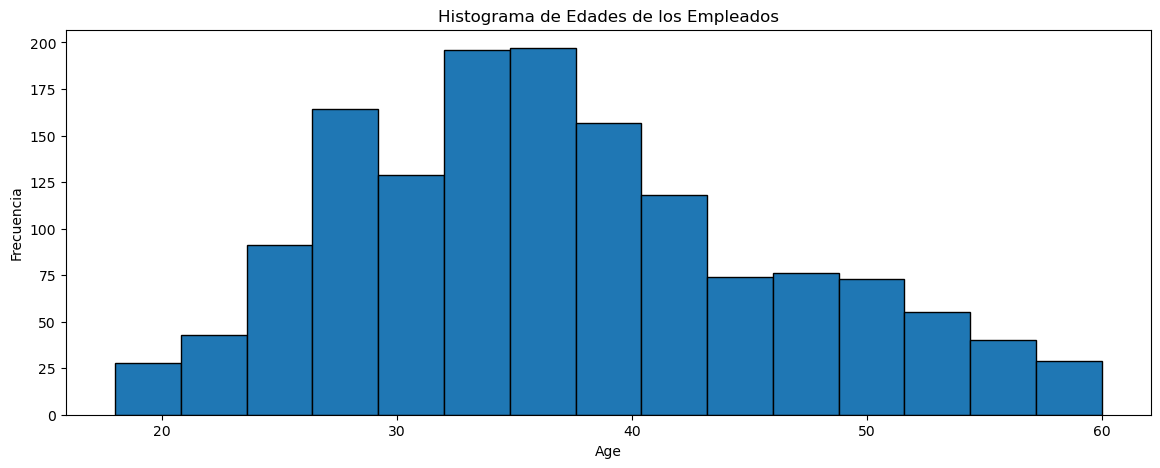

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.hist(df_employees['Age'], bins=15, edgecolor='black')
plt.title('Histograma de Edades de los Empleados')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

### → Creo histogramas de edad para Attrition y no Attrition.

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_12654/3323234664.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_employees[filtro1]['Age'], label="No renuncia", color="green")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_12654/3323234664.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

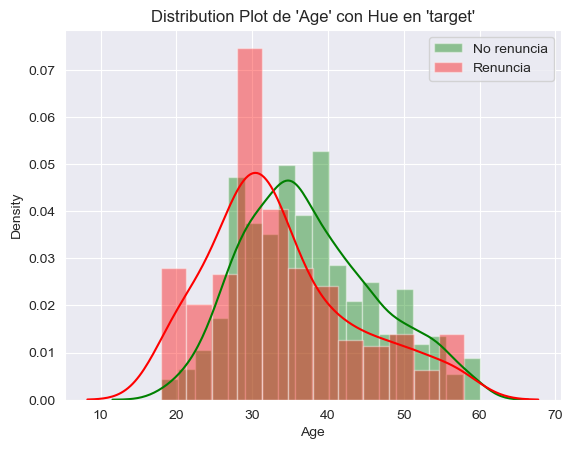

In [18]:
sns.set_style('darkgrid')

filtro1 = df_employees["Attrition"] == 0
filtro2 = df_employees["Attrition"] == 1

sns.distplot(df_employees[filtro1]['Age'], label="No renuncia", color="green")
sns.distplot(df_employees[filtro2]['Age'], label="Renuncia", color="red")

plt.title("Distribution Plot de 'Age' con Hue en 'target'")
plt.legend()
plt.show()

In [19]:
def grupo_etario(x):
    if x <= 30:
        return "joven"
    elif 31 <= x <= 45:
        return "adulto"
    else:
        return "senior"

df_employees["grupo_etario"] = df_employees["Age"].apply(grupo_etario)

In [20]:
df_employees.groupby("grupo_etario").agg({"Attrition" : "mean"}).reset_index()

,grupo_etario,Attrition
0,adulto,0.127004
1,joven,0.259067
2,senior,0.124542


In [21]:
df_employees.groupby("grupo_etario").agg({"Attrition" : "sum"}).reset_index()

,grupo_etario,Attrition
0,adulto,103
1,joven,100
2,senior,34


### → Podemos decir entonces que el grupo etario que tiene mayor tasa de incumplimiento es el de los jovenes, pero no podemos afirmar que la edad sea un factor determinante para la renuncia.

##### Comparación entre menores y mayores


In [22]:
adolescentes = df_employees[df_employees["grupo_etario"] == "menor"] # Grupo 1
mayores = df_employees[df_employees["grupo_etario"] == "mayor"] # Grupo 2

In [23]:
import scipy.stats as stats
from scipy.stats import ttest_ind

group1 = adolescentes["Attrition"]
group2 = mayores["Attrition"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de attrition entre los adolescentes y los mayores.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos")

No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos


##### Comparación entre jóvenes adultos y adultos

In [24]:
jovenes_adultos = df_employees[df_employees["grupo_etario"] == "joven adulto"] # Grupo 3
adultos = df_employees[df_employees["grupo_etario"] == "adulto"] # Grupo 4

In [25]:
group3 = jovenes_adultos["Attrition"]
group4 = adultos["Attrition"]

t_stat, p_value = ttest_ind(group3, group4)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de attrition entre los jóvenes adultos y los adultos.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos")

No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos


### → Análisis de sesgos por MonthlyIncome. Genero histogramas de 'MonthlyIncome' para visualizar la distribución de los montos para personas que renunciaron y no renunciaron.

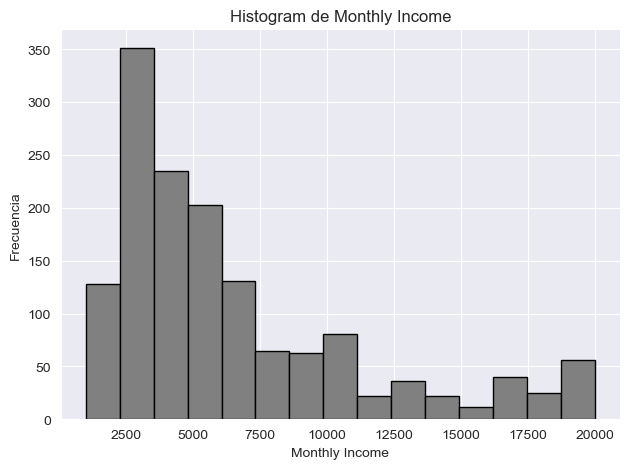

In [26]:
plt.figsize=(14, 5)
plt.hist(df_employees['MonthlyIncome'], bins=15, edgecolor='black', color='gray')
plt.title('Histogram de Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [27]:
yes_attrition = df_employees[df_employees['Attrition'] == 1]
no_attrition = df_employees[df_employees['Attrition'] == 0]

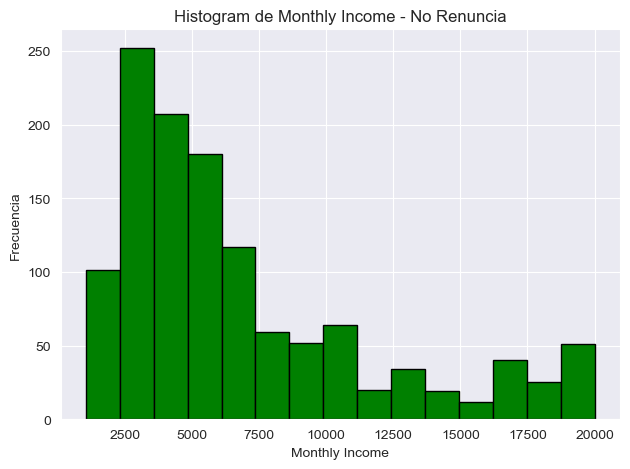

In [28]:
plt.figsize=(14, 5)
plt.hist(no_attrition["MonthlyIncome"], bins=15, edgecolor='black', color="green")
plt.title('Histogram de Monthly Income - No Renuncia')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


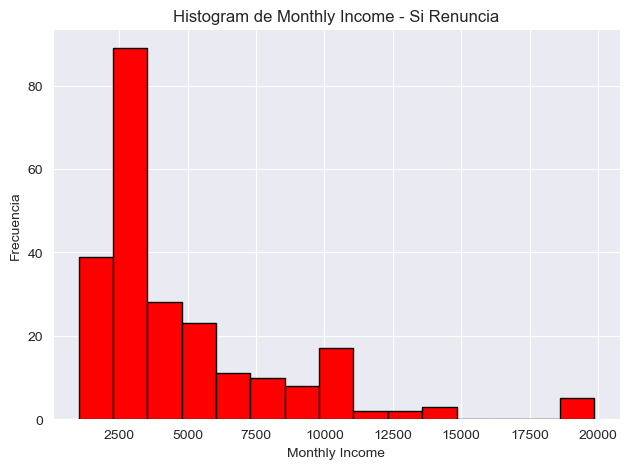

In [29]:
plt.figsize=(14, 5)
plt.hist(yes_attrition["MonthlyIncome"], bins=15, edgecolor='black', color="red")
plt.title('Histogram de Monthly Income - Si Renuncia')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_12654/607915791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_attrition["MonthlyIncome"], label="No Renuncia", color="green")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_12654/607915791.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

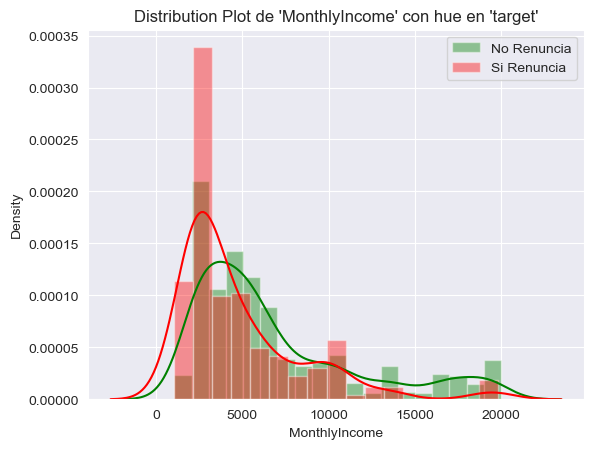

In [30]:
sns.set_style('darkgrid')

sns.distplot(no_attrition["MonthlyIncome"], label="No Renuncia", color="green")
sns.distplot(yes_attrition["MonthlyIncome"], label="Si Renuncia", color="red")

plt.title("Distribution Plot de 'MonthlyIncome' con hue en 'target'")
plt.legend()
plt.show()

<Axes: ylabel='MonthlyIncome'>

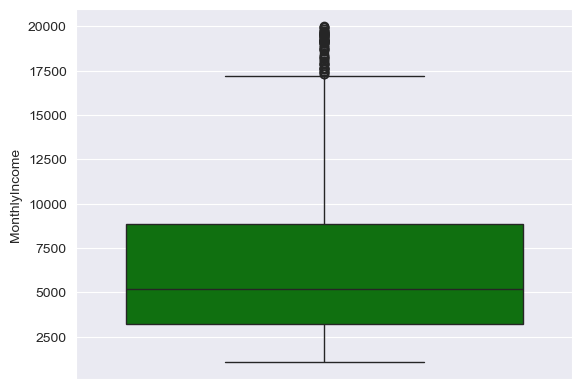

In [31]:
sns.boxplot(no_attrition["MonthlyIncome"], color="green") # Los empleados que no renuncian tienen un ingreso mensual más alto.

<Axes: ylabel='MonthlyIncome'>

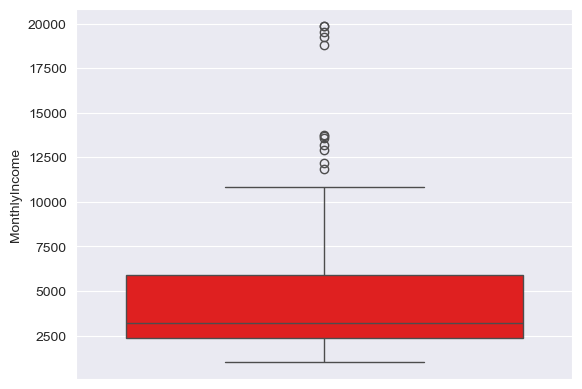

In [32]:
sns.boxplot(yes_attrition["MonthlyIncome"], color="red") # Los empleados que renuncian tienen una media de ingresos más bajos.

#### → Tasa de attrition por departamento.

In [33]:
df_employees.groupby("Department").agg({"Attrition" : "mean"}).reset_index()

,Department,Attrition
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


### `Análisis por variables numéricas (promedios según Attrition)`

In [34]:
df_employees.groupby("Attrition").agg({"Age": "mean", "DistanceFromHome": "mean", "EnvironmentSatisfaction": "mean", "JobInvolvement": "mean", "JobSatisfaction": "mean", "NumCompaniesWorked": "mean", "PerformanceRating": "mean", "RelationshipSatisfaction": "mean", "TotalWorkingYears": "mean", "WorkLifeBalance": "mean",}).reset_index()

,Attrition,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,37.561233,8.915653,2.771290,2.770479,2.778589,2.645580,3.153285,2.733982,11.862936,2.781022
1,1,33.607595,10.632911,2.464135,2.518987,2.468354,2.940928,3.156118,2.599156,8.244726,2.658228


### `Distribución general de la variable Attrition`

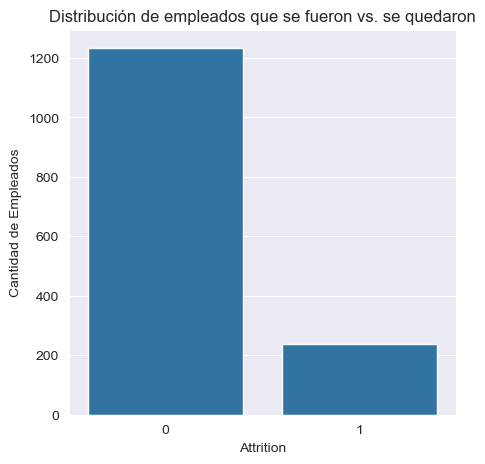

In [35]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_employees, x='Attrition')
plt.title("Distribución de empleados que se fueron vs. se quedaron")
plt.ylabel("Cantidad de Empleados")
plt.show()


### `Análisis por variables categóricas (satisfacción, desempeño, balance)`

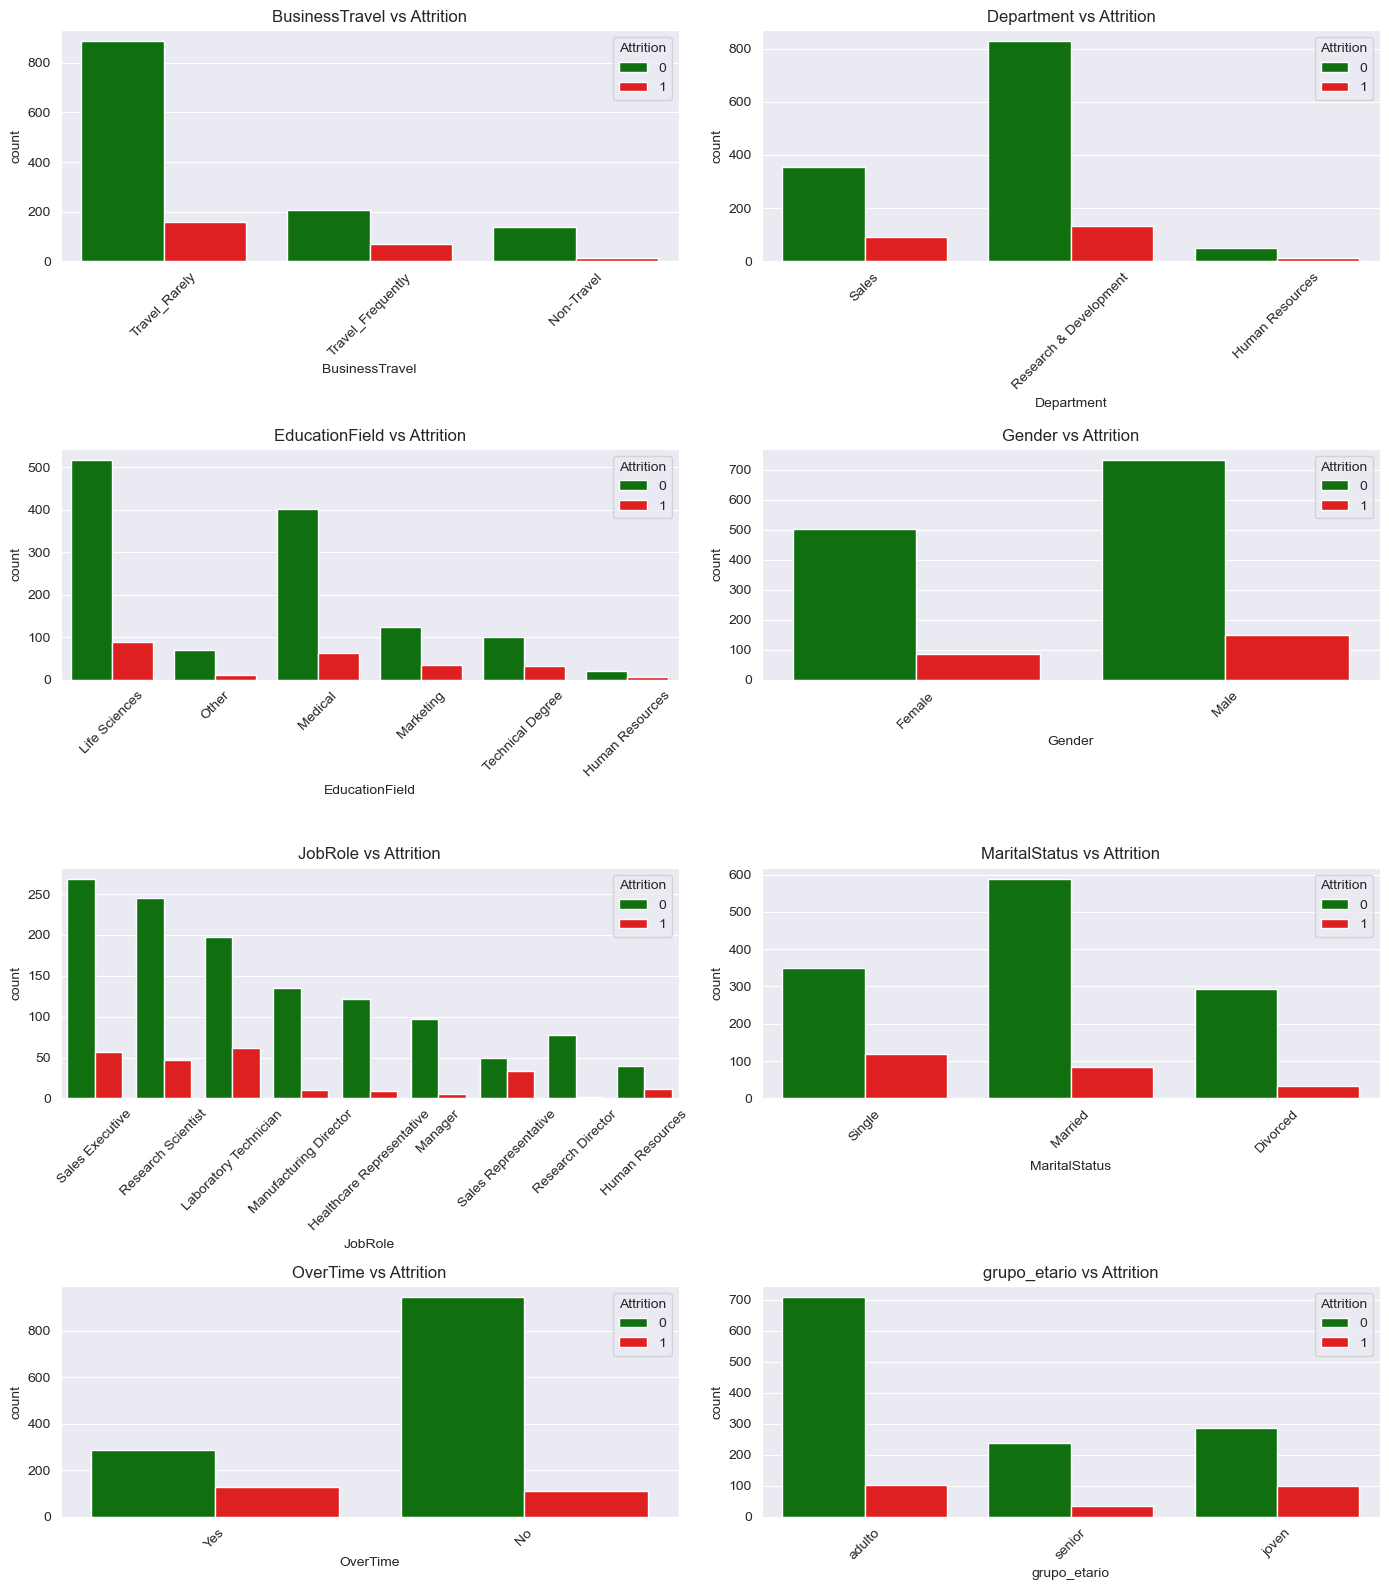

In [36]:
import math

categoricas = df_employees.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_employees, x=col, hue='Attrition', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs Attrition')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, los empleados que han decidido abandonar la empresa tienden a compartir ciertas características que los distinguen del resto. A continuación, se resumen las principales tendencias observadas:

| **Columna (Característica)**           | **Tendencia entre quienes se van** |
|----------------------------------------|-------------------------------------|
| 🧑‍🎓 `Age`                              | Más jóvenes                         |
| 🏠 `DistanceFromHome`                  | Mayor distancia                     |
| 📈 `TotalWorkingYears`                 | Menor experiencia                   |
| 😊 `JobSatisfaction`                   | Baja satisfacción laboral           |
| ⚖️ `WorkLifeBalance`                   | Bajo equilibrio vida-trabajo        |
| 💼 `JobInvolvement`                    | Bajo involucramiento en el trabajo  |
| 🔁 `NumCompaniesWorked`                | Mayor rotación laboral previa       |

Estas tendencias sugieren que el **compromiso, la satisfacción y la estabilidad laboral** son factores clave a considerar en estrategias de retención de talento.


---

## **Parte 3: Preparación de Datos para Modelado**


### → Selección de Características. Decido qué variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [37]:
df_employees.select_dtypes(include=['object']).columns


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'grupo_etario'],
      dtype='object')

In [38]:
df_employees.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'grupo_etario'],
      dtype='object')

#### → Hago get_dummies para las variables categóricas porque si hago LabelEncoder, el modelo puede interpretar que hay un orden entre las categorías. Por ejemplo, en la variable `JobRole`, si hago LabelEncoder, el modelo podría pensar que `Healthcare Representative` es menor que `Human Resources` y eso no es cierto. Por lo tanto, uso get_dummies para evitar este problema.

In [39]:
columns_para_encodear = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', "OverTime", 'grupo_etario']

In [40]:
df_employees = pd.get_dummies(df_employees, columns=columns_para_encodear, drop_first=True)

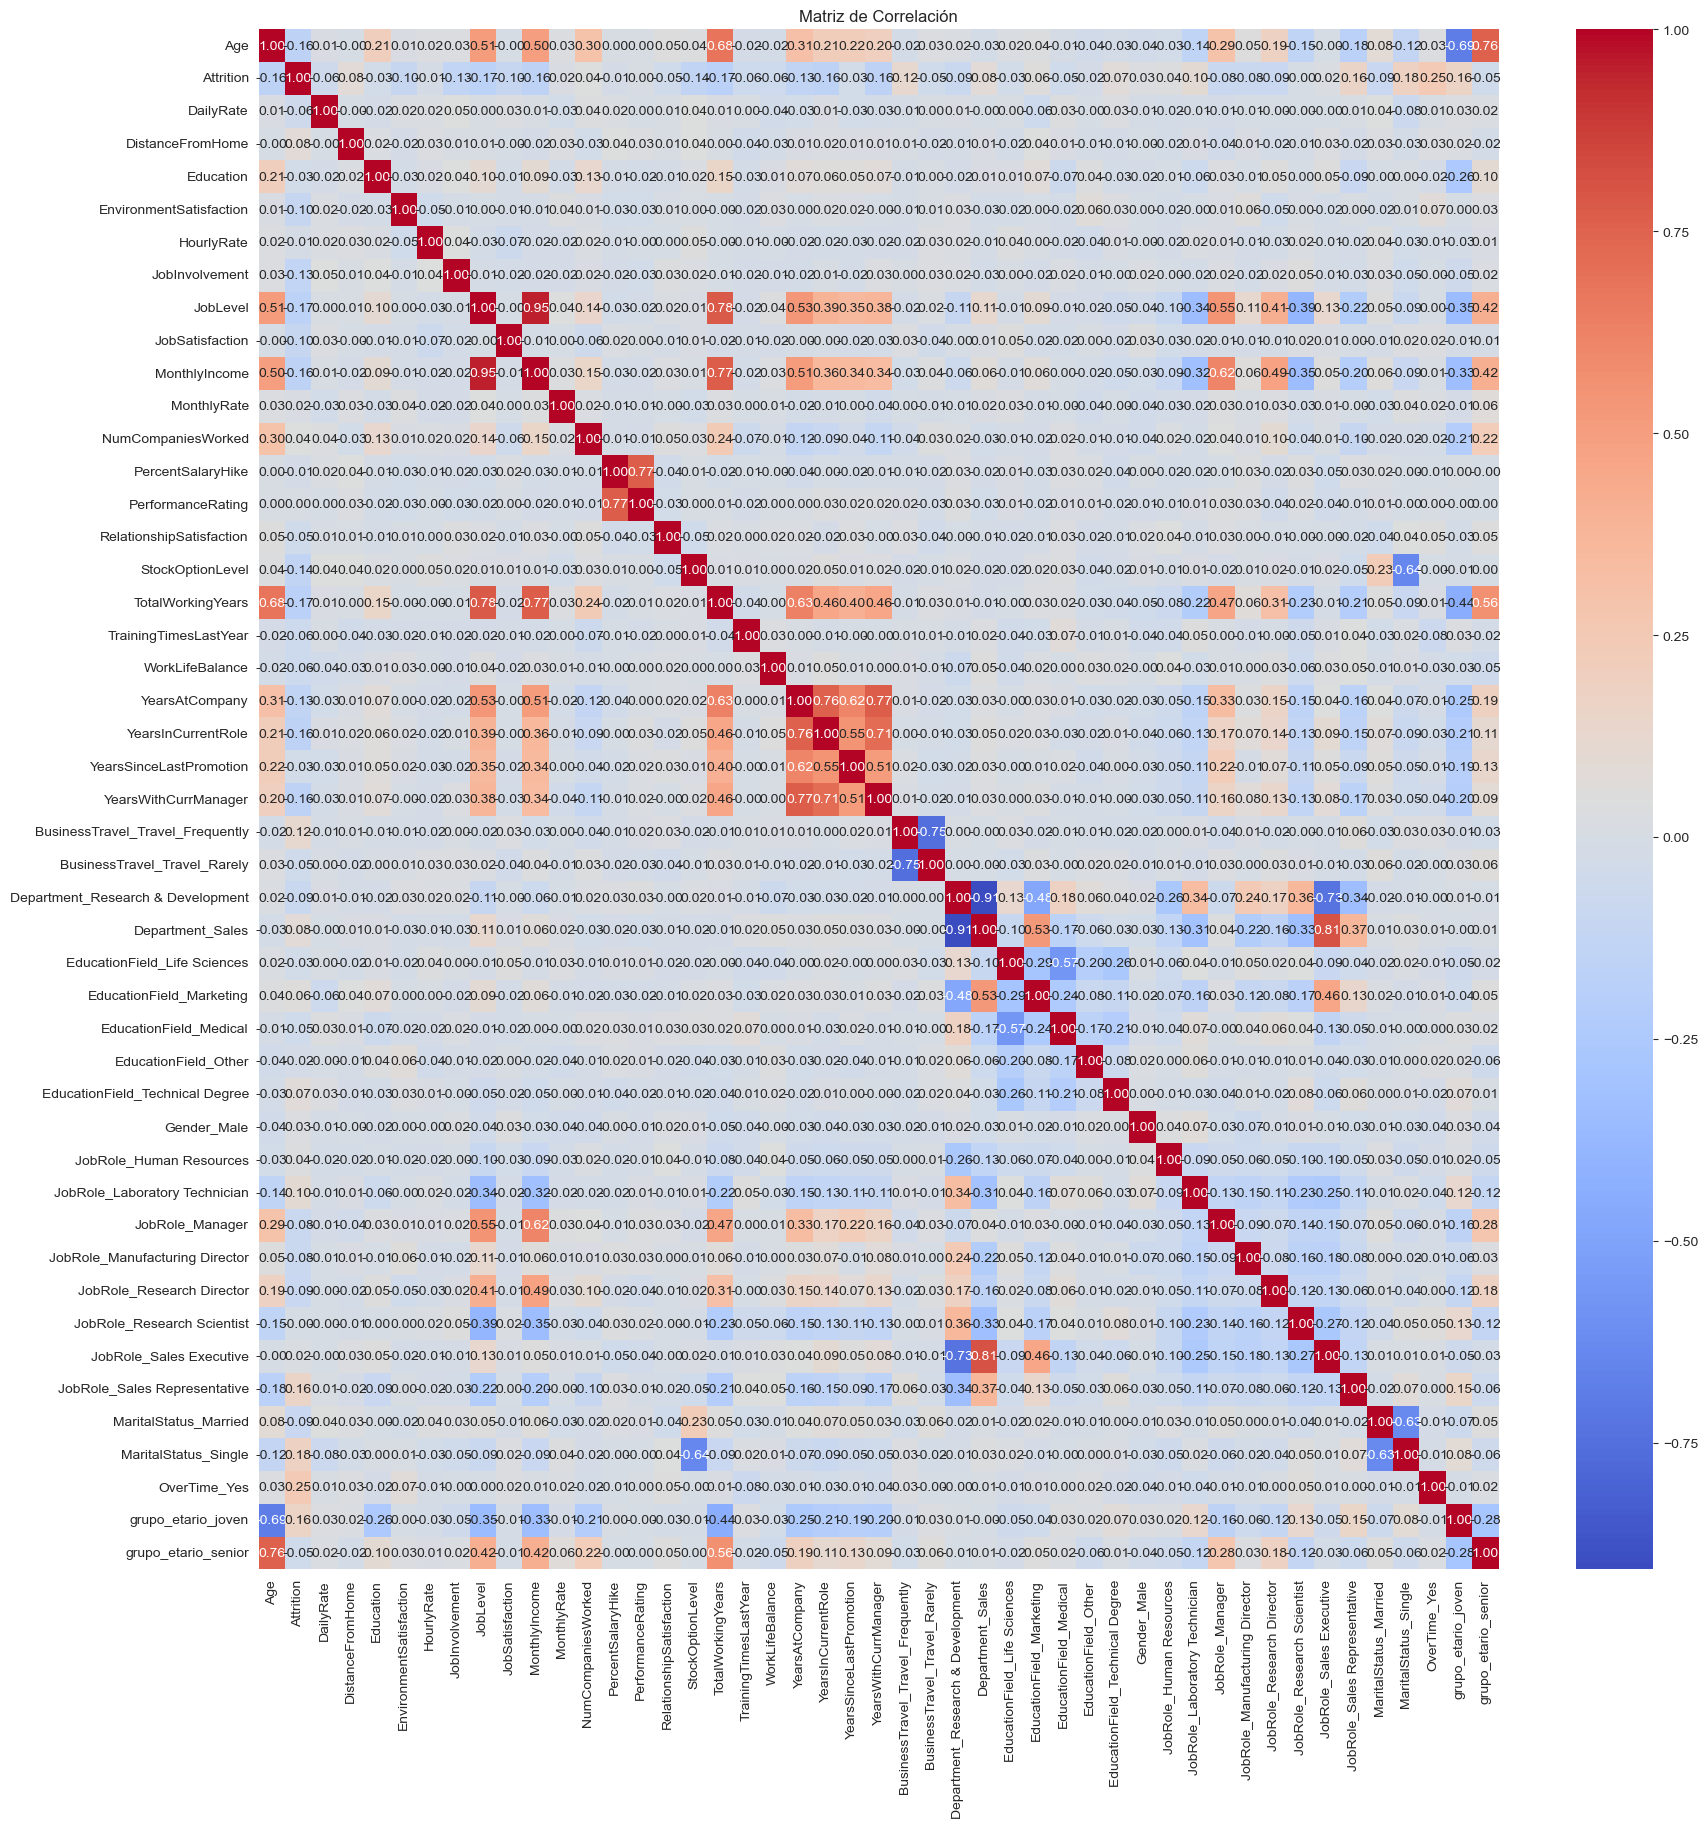

In [41]:
# hacer matriz de correlacion y filtrar las correlaciones mayores a 0.5
plt.figure(figsize=(20, 20))
sns.heatmap(df_employees.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()


In [42]:
X = df_employees.drop(columns=['Attrition'])
y = df_employees['Attrition']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### → Clase desbalanceada. `Attrition` tiene una proporción muy desigual entre clases. Esto genera un modelo sesgado hacia predecir “No”, entonces uso `SMOTE` para balancear las clases.

In [44]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(class_weight='balanced', max_iter=1000)

In [45]:
logisticRegr.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [46]:
# performance en test
y_pred = logisticRegr.predict(X_test)
print('El accuracy de nuestra regresión logística en el set de Test es: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

El accuracy de nuestra regresión logística en el set de Test es: 0.68


In [47]:
# performance en test
y_pred_train = logisticRegr.predict(X_train)
print('El accuracy de nuestra regresión logística en el set de Training es: {:.2f}'.format(logisticRegr.score(X_train, y_train)))

El accuracy de nuestra regresión logística en el set de Training es: 0.74


In [48]:
logisticRegr.coef_
logisticRegr.intercept_
coeficientes= pd.DataFrame(logisticRegr.coef_[0],
                X.columns,
                columns=['coef'])
coeficientes

,coef
Age,0.034848
DailyRate,0.000148
DistanceFromHome,0.040279
Education,0.144443
EnvironmentSatisfaction,-0.246664
HourlyRate,0.002946
JobInvolvement,-0.221806
JobLevel,0.012393
JobSatisfaction,-0.247832
MonthlyIncome,-0.000101


### *Métricas de evaluación*


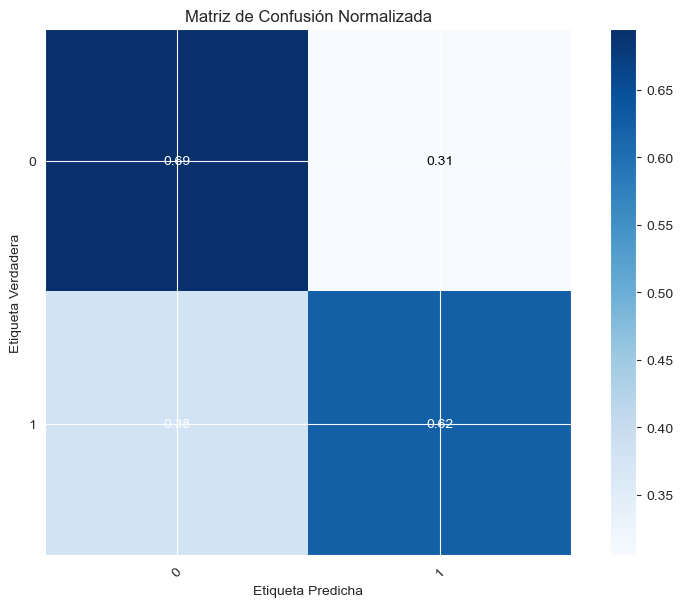

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Supongamos que tienes tus etiquetas verdaderas y etiquetas predichas
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtiene las etiquetas únicas de las clases
classes = unique_labels(y_test, y_pred)

# Visualiza la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title if title else 'Matriz de Confusión')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

# Llama a la función para mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Matriz de Confusión Normalizada')
plt.show()

In [50]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[264 116]
 [ 23  38]]


##### Entendiendo la matriz de confusion:
* TP (53):Empleados que renunciaron y fueron correctamente identificados por el modelo.
* TN (343): Empleados que no renunciaron y fueron correctamente identificados por el modelo.
* FP (37): Empleados que no renunciaron pero fueron incorrectamente identificados como que renunciarían.
* FN (8): Empleados que renunciaron pero fueron incorrectamente identificados como que no renunciarían.

##### En este caso, el modelo tiene un buen rendimiento en la identificación de empleados que renuncian (TP) y en la identificación de empleados que no renuncian (TN). Sin embargo, también tiene un número significativo de falsos positivos (FP) y falsos negativos (FN), lo que indica que hay margen de mejora en la precisión del modelo.

### **Precision, Recall y F-Score**

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### TRAIN

In [52]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_train, y_pred_train)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred_train)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred_train)
print('F1 score: %f' % f1)

Accuracy: 0.737609
Precision: 0.369444
Recall: 0.755682
F1 score: 0.496269


### TEST

In [53]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.684807
Precision: 0.246753
Recall: 0.622951
F1 score: 0.353488


#### En este caso, entre accuracy, precision, recall y f1-score, elijo f1-score como métrica principal porque es una combinación de precisión y recall. Esto es importante en este caso porque queremos minimizar tanto los falsos positivos como los falsos negativos. Un alto f1-score indica que el modelo tiene un buen equilibrio entre precisión y recall.
 
#### Haciendo referencia a este dataset de empleados, un alto f1-score significa que el modelo es capaz de identificar correctamente a los empleados que renunciaron (`Attrition` = 1) y a los que no renunciaron (`Attrition` = 0) con un buen equilibrio entre precisión y recall. Esto es crucial para la empresa, ya que permite tomar decisiones informadas sobre la retención de talento y la implementación de estrategias adecuadas para abordar el problema del aumento de renuncias.



### ROC

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])

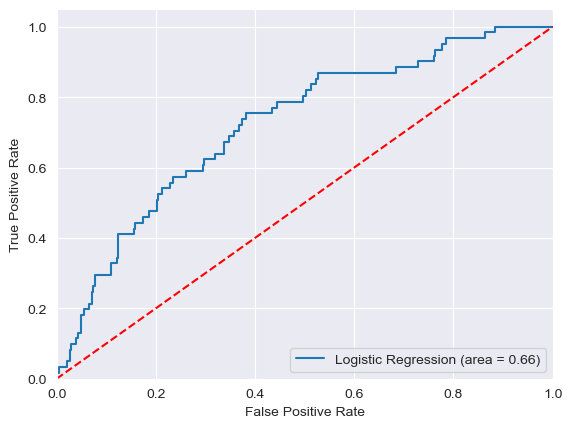

In [56]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
# Calcular el AUC-ROC
auc_roc_test = roc_auc_score(y_test, y_pred)
print("Área bajo la curva ROC Test:", auc_roc_test)

Área bajo la curva ROC Test: 0.6588438308886971


In [58]:
# Calcular el AUC-ROC
auc_roc_train = roc_auc_score(y_train, y_pred_train)
print("Área bajo la curva ROC Training:", auc_roc_train)

Área bajo la curva ROC Training: 0.7447811201108389


In [59]:
resultado_modelo = X_test.copy()

resultado_modelo["pred_attrition"] = y_pred
resultado_modelo["real_attrition"] = y_test

resultado_modelo['tipo_resultado'] = 'N/A'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 1) & (resultado_modelo['real_attrition'] == 1), 'tipo_resultado'] = 'TP'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 1) & (resultado_modelo['real_attrition'] == 0), 'tipo_resultado'] = 'FP'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 0) & (resultado_modelo['real_attrition'] == 0), 'tipo_resultado'] = 'TN'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 0) & (resultado_modelo['real_attrition'] == 1), 'tipo_resultado'] = 'FN'

resultado_modelo.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,grupo_etario_joven,grupo_etario_senior,pred_attrition,real_attrition,tipo_resultado
1041,28,866,5,3,4,84,3,2,1,8463,...,True,False,False,True,False,True,False,0,0,TN
184,53,1084,13,2,4,57,4,2,1,4450,...,False,False,False,False,False,False,True,0,0,TN
1222,24,240,22,1,4,58,1,1,3,1555,...,False,False,True,False,False,True,False,1,1,TP
67,45,1339,7,3,2,59,3,3,1,9724,...,False,False,False,False,False,False,False,0,0,TN
220,36,1396,5,2,4,62,3,2,2,5914,...,False,False,False,True,False,False,False,0,0,TN


In [60]:
resultado_modelo['tipo_resultado'].value_counts()

tipo_resultado
TN    264
FP    116
TP     38
FN     23
Name: count, dtype: int64

### Agrego una columna con el resultado de la predicción.

---

In [61]:
resultado_modelo2 = X_test.copy()

resultado_modelo2["pred_attrition"] = y_pred
resultado_modelo2["real_attrition"] = y_test

# Filtro los casos en donde el modelo predijo que la persona renuncia
mask = resultado_modelo2["pred_attrition"] == 1
predije_deudores = resultado_modelo2[mask]

# Veo cuántos predichos como "sí renuncian" realmente lo hacen
print(predije_deudores.shape)  # cantidad total de predicciones positivas
print(predije_deudores["real_attrition"].value_counts())  # TP vs FP


(154, 48)
real_attrition
0    116
1     38
Name: count, dtype: int64


---

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import pandas as pd

def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print("=== TRAINING RESULTS ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
    print("Classification Report:")
    print(pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True)))

    print("\n=== TESTING RESULTS ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
    print("Classification Report:")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)))
    print(f"AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")


---


## **Parte 4: Arbol de Decisión**


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Modelo base
tree_model = DecisionTreeClassifier(random_state=42, criterion='entropy', class_weight='balanced')
tree_model.fit(X_train, y_train)

# Predicción
y_pred = tree_model.predict(X_test)

# Evaluación inicial
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy inicial:', metrix)


Accuracy inicial: 0.7755102040816326


In [66]:
print("Parámetros por defecto:")
print(tree_model.get_params())


Parámetros por defecto:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [67]:
param_dist_tree = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    "min_samples_leaf": st.randint(3, 10),
    'criterion': ['gini', 'entropy']
}

In [68]:
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [69]:
from sklearn.model_selection import RandomizedSearchCV

random_search_tree = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_dist_tree,
    n_iter=50,
    scoring='recall',
    cv=cv_strategy,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_tree.fit(X_train, y_train)

print("✅ Randomized Search Completado - Decision Tree")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Int

In [70]:
print("Mejores hiperparámetros encontrados:")
random_search_tree.best_params_

Mejores hiperparámetros encontrados:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 10}

In [71]:
best_tree_model = random_search_tree.best_estimator_

print("Modelo final optimizado:")
print(best_tree_model)

evaluate(best_tree_model, X_train, X_test, y_train, y_test)


Modelo final optimizado:
DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=9,
                       min_samples_split=10, random_state=42)
=== TRAINING RESULTS ===
Confusion Matrix:
[[854 132]
 [ 55 135]]
Accuracy: 0.8410
Recall: 0.7105
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.939494    0.505618  0.840986     0.722556      0.869395
recall       0.866126    0.710526  0.840986     0.788326      0.840986
f1-score     0.901319    0.590810  0.840986     0.746064      0.851152
support    986.000000  190.000000  0.840986  1176.000000   1176.000000

=== TESTING RESULTS ===
Confusion Matrix:
[[200  47]
 [ 23  24]]
Accuracy: 0.7619
Recall: 0.7105
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.896861   0.338028  0.761905    0.617445      0.807524
recall       0.809717   0.510638  0.761905    0.660177      0.761905
f1-score     0.851064   0.40

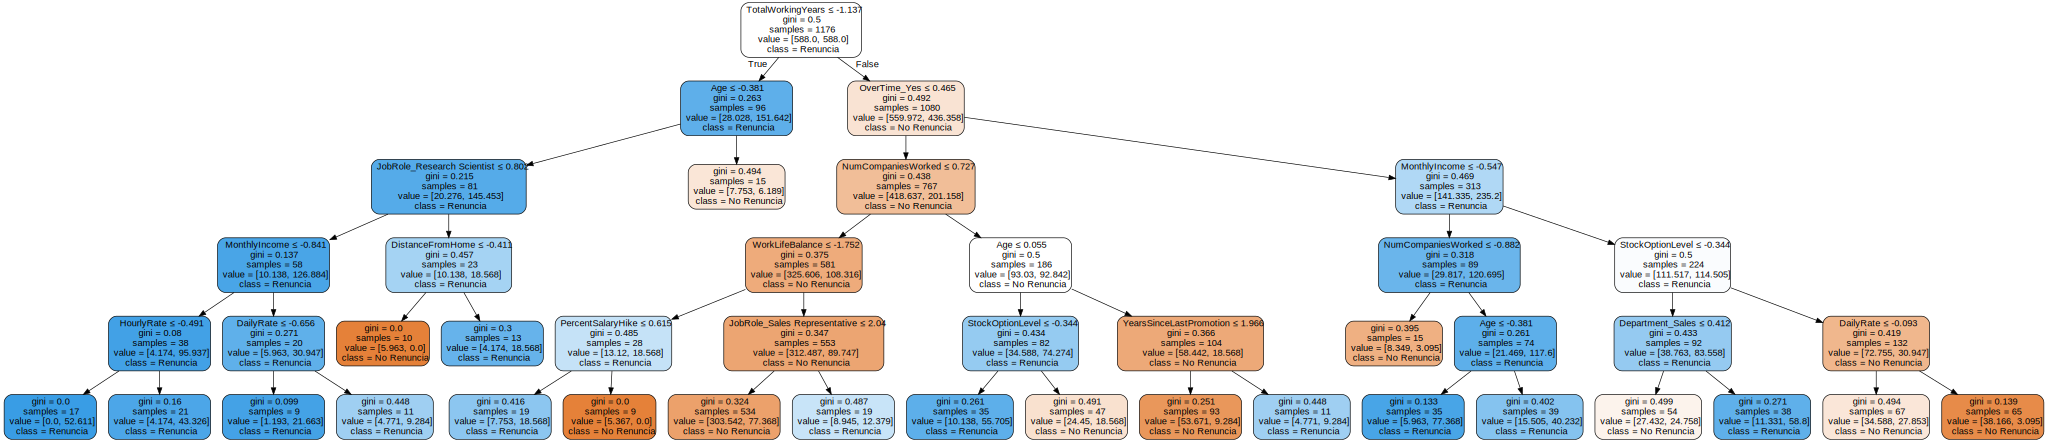

In [72]:
from sklearn.tree import export_graphviz
import graphviz

# Escapar caracteres especiales en nombres de columnas para Graphviz
# df_employees.columns = df_employees.columns.str.replace(r"[^\w\s]", "", regex=True)
safe_feature_names = [f.replace("&", "and").replace("<", "&lt;").replace(">", "&gt;") for f in X.columns]

dot_data = export_graphviz(
    best_tree_model,
    out_file=None,
    feature_names=safe_feature_names,
    class_names=['No Renuncia', 'Renuncia'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("arbol_decision")
graph


## 🌳 Interpretación del Árbol de Decisión

### 🎯 Objetivo del Modelo
Predecir la variable **"Attrition"** (Renuncia o No Renuncia) de empleados, usando como insumo variables como edad, años trabajados, ingreso mensual, etc.

---

### 📌 Nodo Raíz
- **Condición**: `TotalWorkingYears ≤ -1.265`
- Representa empleados con **muy pocos años de experiencia laboral** (escalados o normalizados).
- **Gini: 0.271** → relativamente puro.
- **1176 empleados**
- **986 no renunciaron**, **190 sí**
- Clase mayoritaria: **No Renuncia**

---

### 🔀 Primera Bifurcación

#### 1. Rama Izquierda: `TotalWorkingYears ≤ -1.265`
- **72 empleados**
- Siguiente división: `Age ≤ -0.381`
- Clase mayoritaria: **Renuncia** (41 renuncias vs 31 que no)
- **Gini: 0.49** → mezcla considerable

#### 2. Rama Derecha: `TotalWorkingYears > -1.265`
- **1104 empleados**
- Siguiente división: `OverTime_Yes ≤ 0.465`
- Clase mayoritaria: **No Renuncia** (955 vs 149)
- **Gini: 0.233** → bastante puro

---

### 🧠 Insights Clave

- Los empleados con **menos experiencia y menor edad** tienen **mayor probabilidad de renunciar**.
- La variable **OverTime** es muy relevante:  
  Los que **no hacen horas extra** tienden a **quedarse más**.
- En el nodo de **JobRole = Research Scientist**, si se cumplen ciertas condiciones, se ve una **alta probabilidad de renuncia** (34 de 43 renuncian).
- **WorkLifeBalance** y **MonthlyIncome** también impactan:  
  Mejor balance vida-trabajo y sueldos más altos se asocian con **mayor retención**.
- Ejemplo de clase pura: Nodo con `gini = 0.0`, 8 empleados, **todos permanecieron**.

---

### 🏷️ Métrica Gini
La métrica Gini indica qué tan mezcladas están las clases en un nodo:
- **0.0** = nodo puro (todos de una clase)
- **0.5** = mezcla total (mitad y mitad)




#### Verificamos "a mano" la probabilidad que una persona cualquiera va a renunciar.

In [73]:
empleado = X.sample()
empleado

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,grupo_etario_joven,grupo_etario_senior
1241,32,371,19,3,4,80,1,3,3,9610,...,False,False,False,True,False,True,False,False,False,False


In [74]:
empleado_escalado = sc.transform(empleado)

In [75]:
random_search_tree.best_estimator_.predict_proba(empleado_escalado)

array([[0.29453852, 0.70546148]])

---

## **Parte 5: Ensamble Learning**


In [76]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV

---

## **a) Random Forest // Bagging**

##### 1. Entro un modelo base de Random Forest 

In [77]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [78]:
y_pred = rfc.predict(X_test)

In [79]:
from sklearn import metrics
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', metrix)

Accuracy 0.8333333333333334


##### 2. Veo los hiperparámetros por defecto

In [80]:
print("Parámetros por defecto:")
print(rfc.get_params())

Parámetros por defecto:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


##### 3. Defino el espacio de búsqueda de hiperparámetros

In [81]:
param_dist_rf = {
    "n_estimators": st.randint(100, 300),
    "max_depth": st.randint(2, 6), 
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(2, 6),
    "bootstrap": [True],
    "max_features": ['sqrt'],
    "criterion": ['gini']
}


##### 4. Hago RandomizedSearchCV con Random Forest

In [82]:
random_search_rf = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist_rf,
    n_iter=30,
    scoring='recall',
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_rf.fit(X_train, y_train)
print("✅ Randomized Search Completado - Random Forest")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Randomized Search Completado - Random Forest


In [83]:
print("Mejores hiperparámetros:")
random_search_rf.best_params_

Mejores hiperparámetros:


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 257}

##### 5. Evaluo el mejor modelo encontrado

In [84]:
best_rf_model = random_search_rf.best_estimator_

print("Modelo final optimizado:")
best_rf_model

Modelo final optimizado:


RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=257, random_state=42)

In [85]:
evaluate(best_rf_model, X_train, X_test, y_train, y_test)

=== TRAINING RESULTS ===
Confusion Matrix:
[[829 157]
 [ 73 117]]
Accuracy: 0.8044
Recall: 0.6158
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.919069    0.427007  0.804422     0.673038      0.839569
recall       0.840771    0.615789  0.804422     0.728280      0.804422
f1-score     0.878178    0.504310  0.804422     0.691244      0.817774
support    986.000000  190.000000  0.804422  1176.000000   1176.000000

=== TESTING RESULTS ===
Confusion Matrix:
[[192  55]
 [ 17  30]]
Accuracy: 0.7551
Recall: 0.6158
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.918660   0.352941  0.755102    0.635801      0.828222
recall       0.777328   0.638298  0.755102    0.707813      0.755102
f1-score     0.842105   0.454545  0.755102    0.648325      0.780148
support    247.000000  47.000000  0.755102  294.000000    294.000000
AUC Score: 0.7604


---

## **b) XGBoost // Boosting**


##### 1. Entro un modelo base de XGBoost

In [86]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity = 0) # verbosity=0 para suprimir mensajes de advertencia
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [87]:
y_pred = xgb_model.predict(X_test)

In [88]:
from sklearn import metrics
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy inicial:', metrix)

Accuracy inicial: 0.8503401360544217


##### 2. Veo los hiperparámetros por defecto

In [89]:
print("Parámetros por defecto:")
print(xgb_model.get_params())

Parámetros por defecto:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': 0, 'use_label_encoder': False}


##### 3. Defino el espacio de búsqueda de hiperparámetros

In [90]:
param_dist_xgb = {
    "n_estimators": st.randint(100, 300),
    "learning_rate": st.uniform(0.01, 0.1),
    "max_depth": st.randint(2, 5),
    "min_child_weight": st.randint(3, 10),
    "subsample": st.uniform(0.6, 0.3),
    "colsample_bytree": st.uniform(0.6, 0.3),
    "reg_alpha": st.uniform(1, 5),
    "reg_lambda": st.uniform(1, 5),
}


##### 4. Hago RandomizedSearchCV con XGBoost

In [91]:
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=30,
    scoring='recall',
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_xgb.fit(X_train, y_train)

print("✅ Randomized Search Completado - XGBoost")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Randomized Search Completado - XGBoost


In [92]:
print("Mejores hiperparámetros encontrados:")
random_search_xgb.best_params_

Mejores hiperparámetros encontrados:


{'colsample_bytree': 0.6800343042825855,
 'learning_rate': 0.1076614955832653,
 'max_depth': 3,
 'min_child_weight': 9,
 'n_estimators': 228,
 'reg_alpha': 2.197809453334862,
 'reg_lambda': 1.7244743604561155,
 'subsample': 0.7468358280832689}

##### 5. Evaluo el mejor modelo encontrado

In [93]:
best_xgb_model = random_search_xgb.best_estimator_

print("Modelo final optimizado:")
best_xgb_model

Modelo final optimizado:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6800343042825855, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1076614955832653,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=228, n_jobs=None,
              num_parallel_tree=None, ...)

In [94]:
evaluate(best_xgb_model, X_train, X_test, y_train, y_test)

=== TRAINING RESULTS ===
Confusion Matrix:
[[980   6]
 [ 66 124]]
Accuracy: 0.9388
Recall: 0.6526
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.936902    0.953846  0.938776     0.945374      0.939640
recall       0.993915    0.652632  0.938776     0.823273      0.938776
f1-score     0.964567    0.775000  0.938776     0.869783      0.933940
support    986.000000  190.000000  0.938776  1176.000000   1176.000000

=== TESTING RESULTS ===
Confusion Matrix:
[[239   8]
 [ 33  14]]
Accuracy: 0.8605
Recall: 0.6526
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.878676   0.636364  0.860544    0.757520      0.839939
recall       0.967611   0.297872  0.860544    0.632742      0.860544
f1-score     0.921002   0.405797  0.860544    0.663400      0.838639
support    247.000000  47.000000  0.860544  294.000000    294.000000
AUC Score: 0.8109


---

## **c) LightBoost // Boosting**


##### 1. Entro un modelo base de XGBoost

In [95]:
from lightgbm import LGBMClassifier

# Modelo base
lgbm_model = LGBMClassifier(random_state=42, verbose=-1) # verbose= -1  silencia todos los logs internos de LightGBM (inclusive los warnings No further splits...)
lgbm_model.fit(X_train, y_train)

# Predicción
y_pred = lgbm_model.predict(X_test)

# Evaluación inicial
from sklearn import metrics
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy inicial:', metrix)

Accuracy inicial: 0.8639455782312925


##### 2. Veo los hiperparámetros por defecto

In [96]:
print("Parámetros por defecto:")
print(lgbm_model.get_params())

Parámetros por defecto:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1}


##### 3. Defino el espacio de búsqueda de hiperparámetros

In [97]:
param_dist_lgbm = {
    "n_estimators": st.randint(100, 300),
    "learning_rate": st.uniform(0.01, 0.1),
    "max_depth": st.randint(2, 5),
    "min_child_samples": st.randint(5, 20),
    "subsample": st.uniform(0.6, 0.3),
    "colsample_bytree": st.uniform(0.6, 0.3),
    "reg_alpha": st.uniform(1, 5),
    "reg_lambda": st.uniform(1, 5)
}

##### 4. Hacer RandomizedSearchCV con LightGBM

In [98]:
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist_lgbm,
    n_iter=30,
    scoring='recall',
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_lgbm.fit(X_train, y_train)

print("✅ Randomized Search Completado - LightGBM")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Randomized Search Completado - LightGBM


In [99]:
print("Mejores hiperparámetros encontrados:")
random_search_lgbm.best_params_

Mejores hiperparámetros encontrados:


{'colsample_bytree': 0.6800343042825855,
 'learning_rate': 0.1076614955832653,
 'max_depth': 3,
 'min_child_samples': 11,
 'n_estimators': 228,
 'reg_alpha': 2.197809453334862,
 'reg_lambda': 1.7244743604561155,
 'subsample': 0.7468358280832689}

##### 5. Evaluar el mejor modelo encontrado

In [100]:
best_lgbm_model = random_search_lgbm.best_estimator_

print("Modelo final optimizado:")
best_lgbm_model

Modelo final optimizado:


LGBMClassifier(colsample_bytree=0.6800343042825855,
               learning_rate=0.1076614955832653, max_depth=3,
               min_child_samples=11, n_estimators=228, random_state=42,
               reg_alpha=2.197809453334862, reg_lambda=1.7244743604561155,
               subsample=0.7468358280832689, verbose=-1)

In [101]:
evaluate(best_lgbm_model, X_train, X_test, y_train, y_test)

=== TRAINING RESULTS ===
Confusion Matrix:
[[983   3]
 [ 53 137]]
Accuracy: 0.9524
Recall: 0.7211
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.948842    0.978571  0.952381     0.963707      0.953645
recall       0.996957    0.721053  0.952381     0.859005      0.952381
f1-score     0.972305    0.830303  0.952381     0.901304      0.949362
support    986.000000  190.000000  0.952381  1176.000000   1176.000000

=== TESTING RESULTS ===
Confusion Matrix:
[[242   5]
 [ 32  15]]
Accuracy: 0.8741
Recall: 0.7211
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.883212   0.750000   0.87415    0.816606      0.861916
recall       0.979757   0.319149   0.87415    0.649453      0.874150
f1-score     0.928983   0.447761   0.87415    0.688372      0.852053
support    247.000000  47.000000   0.87415  294.000000    294.000000
AUC Score: 0.7862


---

## **d) Voting // Boosting**

#####  1. Creo el VotingClassifier con los mejores modelos

In [102]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('lgbm', best_lgbm_model),
        ('tree', best_tree_model)  
    ],
    voting='soft'  # usar probabilidades, más preciso que 'hard'
)

##### 2. Entrenar el modelo Voting

In [103]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=2,
                                                     min_samples_leaf=3,
                                                     min_samples_split=9,
                                                     n_estimators=257,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6800343042825855,
                                            device=None,
                                            early_stopping_rounds=No...
                              LGBMClassifier(colsample_bytree=0.6800343042825855,
                                             learning_rate=0.1076614955832653,
                                             max_depth=3, min_child_samples=11,
                                             n_estimators=228, random_state=42,
                                             reg_alpha=2.197809453334862,
                                             reg_lambda=1.7244743604561155,
                                             subsample=0.7468358280832689,
                                             verbose=-1)),
                             ('tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     min_samples_leaf=9,
                                                     min_samples_split=10,
                                                     random_state=42))],
                 voting='soft')

##### 3. Evaluo el modelo Voting final

In [104]:
evaluate(voting_clf, X_train, X_test, y_train, y_test)

=== TRAINING RESULTS ===
Confusion Matrix:
[[971  15]
 [ 52 138]]
Accuracy: 0.9430
Recall: 0.7263
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.949169    0.901961  0.943027     0.925565      0.941542
recall       0.984787    0.726316  0.943027     0.855551      0.943027
f1-score     0.966650    0.804665  0.943027     0.885657      0.940479
support    986.000000  190.000000  0.943027  1176.000000   1176.000000

=== TESTING RESULTS ===
Confusion Matrix:
[[232  15]
 [ 29  18]]
Accuracy: 0.8503
Recall: 0.7263
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.888889   0.545455   0.85034    0.717172      0.833986
recall       0.939271   0.382979   0.85034    0.661125      0.850340
f1-score     0.913386   0.450000   0.85034    0.681693      0.839307
support    247.000000  47.000000   0.85034  294.000000    294.000000
AUC Score: 0.7819


In [105]:
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_voting))
print("AUC:", metrics.roc_auc_score(y_test, y_proba_voting))

Accuracy: 0.8503401360544217
AUC: 0.7818933586010853


---

## **Parte 8: Comparación de Modelos**


In [106]:
logisticRegr
best_tree_model
best_rf_model
best_xgb_model
best_lgbm_model
voting_clf


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=2,
                                                     min_samples_leaf=3,
                                                     min_samples_split=9,
                                                     n_estimators=257,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6800343042825855,
                                            device=None,
                                            early_stopping_rounds=No...
                              LGBMClassifier(colsample_bytree=0.6800343042825855,
                                             learning_rate=0.1076614955832653,
                                             max_depth=3, min_child_samples=11,
                                             n_estimators=228, random_state=42,
                                             reg_alpha=2.197809453334862,
                                             reg_lambda=1.7244743604561155,
                                             subsample=0.7468358280832689,
                                             verbose=-1)),
                             ('tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     min_samples_leaf=9,
                                                     min_samples_split=10,
                                                     random_state=42))],
                 voting='soft')

In [107]:

### ACCURACY
scores = {
    'Logistic Regression': {'Train': logisticRegr.score(X_train, y_train), 'Test': logisticRegr.score(X_test, y_test)},
    'Decision Tree': {'Train': best_tree_model.score(X_train, y_train), 'Test': best_tree_model.score(X_test, y_test)},
    'Random Forest': {'Train': best_rf_model.score(X_train, y_train), 'Test': best_rf_model.score(X_test, y_test)},
    'XGBoost': {'Train': best_xgb_model.score(X_train, y_train), 'Test': best_xgb_model.score(X_test, y_test)},
    'LGBM': {'Train': best_lgbm_model.score(X_train, y_train), 'Test': best_lgbm_model.score(X_test, y_test)},
    'Voting': {'Train': voting_clf.score(X_train, y_train), 'Test': voting_clf.score(X_test, y_test)},
}

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

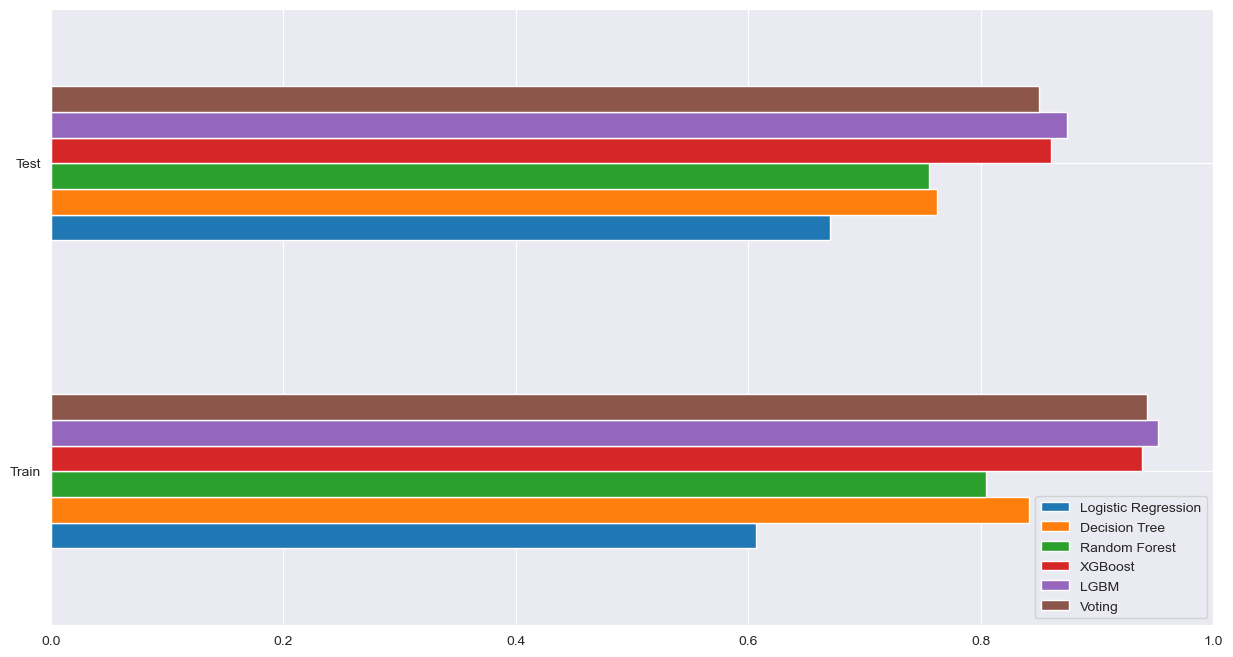

In [108]:
accuracy_scores_df = pd.DataFrame(scores)
accuracy_scores_df.plot(kind='barh', figsize=(15, 8))

In [109]:
### RECALL
recall_scores = {
    'Logistic Regression': {'Train': recall_score(y_train, logisticRegr.predict(X_train)), 'Test': recall_score(y_test, logisticRegr.predict(X_test))},
    'Decision Tree': {'Train': recall_score(y_train, best_tree_model.predict(X_train)),'Test': recall_score(y_test, best_tree_model.predict(X_test))},
    'Random Forest': {'Train': recall_score(y_train, best_rf_model.predict(X_train)),'Test': recall_score(y_test, best_rf_model.predict(X_test))},
    'XGBoost': {'Train': recall_score(y_train, best_xgb_model.predict(X_train)),'Test': recall_score(y_test, best_xgb_model.predict(X_test))},
    'LGBM': {'Train': recall_score(y_train, best_lgbm_model.predict(X_train)),'Test': recall_score(y_test, best_lgbm_model.predict(X_test))},
    'Voting': {'Train': recall_score(y_train, voting_clf.predict(X_train)),'Test': recall_score(y_test, voting_clf.predict(X_test))}
}

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

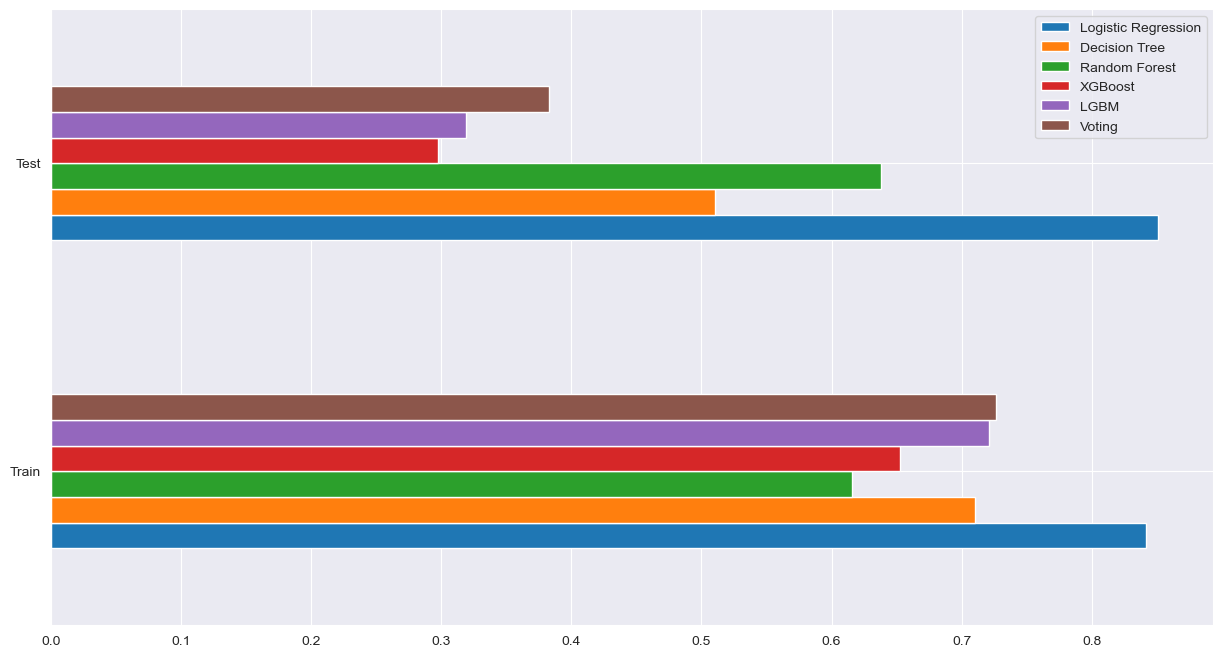

In [110]:
recall_scores_df = pd.DataFrame(recall_scores)
recall_scores_df.plot(kind='barh', figsize=(15, 8))

___

## **Parte 9: Pipelines**


#### 🔧 Paso 1: Asegurar que los datos sean `DataFrame`

In [111]:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X.columns)

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X.columns)

📌 ¿Qué hace?
- Evita errores al usar ColumnTransformer, que requiere que X_train y X_test sean DataFrames (porque se referencia por nombre de columna, no por índice).

#### 🔍 Paso 2: Definir las columnas numéricas y categóricas

In [112]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

📌 ¿Qué hace?
- Identifica automáticamente qué columnas son numéricas y cuáles categóricas para aplicar distintos preprocesamientos.

#### 🧼 Paso 3: Crear los pipelines de preprocesamiento

In [113]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

poly = PolynomialFeatures()

numeric_transformer = Pipeline([
    ("poly", poly),
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

📌 ¿Qué hace?

Aplica transformaciones a las columnas numéricas y categóricas por separado:

- A las numéricas les agrega combinaciones polinómicas, las imputa y las escala.

- A las categóricas les imputa la moda y les hace one-hot encoding.

#### 🧩 Paso 4: Unificar el preprocesamiento con `ColumnTransformer`

In [114]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
], remainder="passthrough")

📌 ¿Qué hace?
- Combina ambos pipelines (numeric + categorical) en uno solo, y lo deja listo para conectarse al modelo. Aplica el preprocesamiento automáticamente a las columnas correctas.

##### 🎯 Paso 5: Definir el espacio de búsqueda (`search_space`)

In [115]:
import scipy.stats as st

one_to_left = st.uniform(0.01, 1.0)

params_tree = {
    "classifier__max_depth": st.randint(3, 12),
    "classifier__min_samples_split": st.randint(2, 10)
}

params_forest = {
    "classifier__n_estimators": st.randint(50, 200),
    "classifier__max_depth": st.randint(3, 12),
    "classifier__min_samples_split": st.randint(2, 10)
}

params_boosting = {
    "classifier__n_estimators": st.randint(50, 200),
    "classifier__max_depth": st.randint(3, 12),
    "classifier__learning_rate": st.uniform(0.05, 0.4),
    "classifier__subsample": one_to_left
}

search_space = [
    {"classifier": [LogisticRegression(max_iter=1000)],
     "classifier__C": [10**x for x in range(-5, 3)]},

    {"classifier": [DecisionTreeClassifier()],
     **params_tree},

    {"classifier": [RandomForestClassifier()],
     **params_forest},

    {"classifier": [XGBClassifier(use_label_encoder=False, eval_metric="logloss")],
     **params_boosting},

    {"classifier": [LGBMClassifier(verbose=-1)],
     **params_boosting},
]

📌 ¿Qué hace?
- Define los modelos a probar y sus rangos de hiperparámetros. Cada diccionario en la lista representa un modelo distinto que se va a entrenar y evaluar.

#### 🔗 Paso 6: Armar el `Pipeline` completo

In [116]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())  # Placeholder (se reemplaza en la búsqueda)
])

##### ❓ Preguntas frecuentes sobre el Pipeline

| Pregunta                                                                 | Respuesta                                                   |
|--------------------------------------------------------------------------|--------------------------------------------------------------|
| ¿Incluye a `XGBoost`, `LGBM`, etc.?                                      | ✅ **Sí**, porque están definidos en el `search_space`       |
| ¿Necesito ponerlos manualmente en `Pipeline(...)`?                       | ❌ **No**, se reemplazan dinámicamente por `RandomizedSearchCV` |
| ¿El `LogisticRegression` que aparece por defecto se usa sí o sí?         | ✅ **Solo como valor inicial**, pero se reemplaza durante la búsqueda |


📌 ¿Qué hace?
- Une el preprocesamiento y el modelo en un único flujo de trabajo automatizado. `classifier` es el lugar donde se enchufan los modelos que definimos en `search_space`.

#### 🧪 Paso 7: Ejecutar RandomizedSearchCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
    pipeline,
    search_space,
    n_iter=50,
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1,
    scoring="recall"
)

search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:12:21] WARNING: /Users/runner/work/

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DailyRate',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'Environment...
                                         'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13d4c62d0>,
                                         'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13d4c75d0>,
                                         'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13d4c7e90>,
                                         'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13d56ea50>}],
                   scoring='recall', verbose=1)

📌 ¿Qué hace?
- Busca la mejor combinación de modelo + hiperparámetros usando validación cruzada, todo dentro del mismo pipeline.

#### ✅ Paso 8: Predecir y evaluar el mejor modelo

In [118]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

y_pred = search.predict(X_test)

print("🔍 Best Estimator:\n")
search.best_estimator_

🔍 Best Estimator:



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',...
                                                   'JobRole_Laboratory '
                                                   'Technician',
                                                   'JobRole_Manager',
                                                   'JobRole_Manufacturing '
                                                   'Director',
                                                   'JobRole_Research Director',
                                                   'JobRole_Research Scientist',
                                                   'JobRole_Sales Executive',
                                                   'JobRole_Sales '
                                                   'Representative',
                                                   'MaritalStatus_Married',
                                                   'MaritalStatus_Single',
                                                   'OverTime_Yes',
                                                   'grupo_etario_joven',
                                                   'grupo_etario_senior'])])),
                ('classifier', LogisticRegression(C=10, max_iter=1000))])

In [119]:
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7891156462585034
✅ Recall: 0.425531914893617

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       247
           1       0.36      0.43      0.39        47

    accuracy                           0.79       294
   macro avg       0.63      0.64      0.63       294
weighted avg       0.80      0.79      0.80       294

